In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# Now working with real data

# Load the data

df = pd.read_excel("Movie Recommendation 2024 (Responses).xlsx")
df.head(10)

,Timestamp,Your name,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
0,2024-02-06 09:42:36.374,Srijahnavi,4.0,3.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0
1,2024-02-06 09:42:50.227,Priya,3.0,3.0,3.0,4.0,4.0,4.0,5.0,3.0,3.0,4.0
2,2024-02-06 09:43:05.181,Pulkit Gautam,4.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,4.0,3.0
3,2024-02-06 09:43:16.138,Twinkle Devda,5.0,4.0,5.0,4.0,2.0,4.0,NaN,NaN,NaN,4.0
4,2024-02-06 09:43:18.300,Ishika Raj,5.0,5.0,4.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
5,2024-02-06 09:43:37.950,Kaushik,1.0,4.0,5.0,5.0,2.0,4.0,5.0,3.0,NaN,4.0
6,2024-02-06 09:43:48.787,Kajal,3.0,4.0,NaN,4.0,3.0,5.0,NaN,NaN,NaN,4.0
7,2024-02-06 09:43:58.223,sawan verma,4.0,5.0,5.0,5.0,4.0,4.0,NaN,4.0,NaN,4.0
8,2024-02-06 09:43:58.698,Daksh Jain,5.0,NaN,5.0,5.0,4.0,4.0,5.0,5.0,NaN,4.0
9,2024-02-06 09:44:13.505,Akshat Pratap Singh,4.0,NaN,5.0,5.0,4.0,NaN,NaN,5.0,NaN,4.0


In [5]:
# Discard the timestamp column

df = df.drop('Timestamp', axis=1)

# Make the "Your Name" column the index

df = df.set_index('Your name')
df

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Srijahnavi,4.0,3.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0
Priya,3.0,3.0,3.0,4.0,4.0,4.0,5.0,3.0,3.0,4.0
Pulkit Gautam,4.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,4.0,3.0
Twinkle Devda,5.0,4.0,5.0,4.0,2.0,4.0,NaN,NaN,NaN,4.0
Ishika Raj,5.0,5.0,4.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Yash Bothra,3.0,4.0,4.0,4.0,3.0,4.0,5.0,5.0,NaN,3.0
Zaqi,2.0,3.0,4.0,5.0,2.0,4.0,5.0,5.0,3.0,4.0
Manas Kawal,3.0,NaN,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0


In [6]:
df.index

Index(['Srijahnavi ', 'Priya', 'Pulkit Gautam', 'Twinkle Devda ',
       'Ishika Raj ', 'Kaushik', 'Kajal', 'sawan verma', 'Daksh Jain',
       'Akshat Pratap Singh ',
       ...
       'Shreya Patel', 'Omkar Rajeev Prabhu', 'Nihar Shah', 'Sai Krishna ',
       'Mithil Pechimuthu', 'Yash Bothra', 'Zaqi', 'Manas Kawal ',
       'Siya Patil', 'Gaurav Kumar'],
      dtype='object', name='Your name', length=114)

In [7]:
# Get index for user and movie
user = 'Ayush Shrivastava'

print(user in df.index)

# Get the movie ratings for user
user_ratings = df.loc[user]
user_ratings

True


Sholay                      5.0
Swades (We The People)      4.0
The Matrix (I)              5.0
Interstellar                5.0
Dangal                      3.0
Taare Zameen Par            4.0
Shawshank Redemption        4.0
The Dark Knight             4.0
Notting Hill                3.0
Uri: The Surgical Strike    4.0
Name: Ayush Shrivastava, dtype: float64

In [8]:
# Number of missing values
df.isnull().sum()

Sholay                      18
Swades (We The People)      45
The Matrix (I)              21
Interstellar                13
Dangal                       1
Taare Zameen Par             1
Shawshank Redemption        46
The Dark Knight             31
Notting Hill                63
Uri: The Surgical Strike    11
dtype: int64

In [9]:
# Generic Matrix Factorization (without missing values)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

n_users, n_movies = 20, 10

# A is a matrix of size (n_users, n_movies) randomly generated values between 1 and 5
A = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
A

tensor([[1., 4., 5., 3., 4., 4., 2., 5., 2., 2.],
        [4., 3., 1., 1., 2., 1., 3., 2., 5., 1.],
        [4., 2., 2., 4., 2., 4., 1., 5., 4., 1.],
        [3., 1., 3., 2., 1., 3., 1., 1., 1., 2.],
        [5., 1., 5., 1., 3., 5., 2., 3., 5., 1.],
        [2., 2., 3., 2., 4., 5., 3., 4., 2., 1.],
        [5., 5., 1., 5., 4., 2., 5., 5., 2., 4.],
        [5., 4., 2., 4., 1., 2., 2., 5., 1., 1.],
        [4., 5., 5., 5., 4., 5., 1., 1., 1., 5.],
        [4., 2., 5., 1., 5., 4., 1., 4., 1., 1.],
        [5., 1., 3., 3., 1., 1., 2., 4., 2., 4.],
        [5., 5., 4., 3., 1., 5., 3., 4., 3., 1.],
        [4., 4., 3., 5., 3., 2., 4., 5., 4., 2.],
        [1., 4., 3., 3., 2., 3., 2., 4., 3., 1.],
        [1., 3., 4., 2., 4., 4., 2., 4., 1., 4.],
        [4., 1., 3., 3., 3., 4., 2., 2., 2., 1.],
        [4., 3., 4., 5., 3., 1., 2., 5., 1., 5.],
        [1., 1., 1., 5., 5., 3., 4., 5., 4., 4.],
        [1., 4., 4., 1., 5., 4., 3., 3., 4., 5.],
        [5., 1., 5., 5., 2., 2., 3., 4., 5., 3.]])

In [10]:
A.shape

torch.Size([20, 10])

Let us decompose A as WH. W is of shape (n, k) and H is of shape (k, n). We can write the above equation as:
A = WH

In [11]:
# Randomly initialize A and B

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

r = 3
W = torch.randn(n_users, r, requires_grad=True, device=device)
H = torch.randn(r, n_movies, requires_grad=True, device=device)

A = A.to(device)

# Compute the loss
with torch.no_grad():
    loss = torch.norm(torch.mm(W, H) - A)
    print(loss)

tensor(53.8487, device='cuda:0')


In [14]:
pd.DataFrame(torch.mm(W, H).cpu().detach().numpy()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.789320,0.273251,-0.803057,0.026515,-0.439304,0.704782,-0.403163,0.184198,-0.386802,0.390207
1,-2.582092,-0.965984,-4.715790,0.464595,-0.800138,2.220691,-1.210865,1.380103,-2.509600,-0.448290
2,-6.278386,-2.250423,-0.746872,0.326767,1.347383,-1.277587,0.722436,0.489918,-0.613798,-2.293076
3,-0.894911,-0.162974,0.904375,-0.071838,-0.077017,0.688095,1.019274,-0.818665,0.918633,-0.569915
4,1.630395,0.457543,0.028392,-0.036418,0.088358,-0.830817,-0.725712,0.438782,-0.337688,0.723440


In [15]:
pd.DataFrame(A.cpu().detach().numpy()).head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,4.0,5.0,3.0,4.0,4.0,2.0,5.0,2.0,2.0
1,4.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,5.0,1.0
2,4.0,2.0,2.0,4.0,2.0,4.0,1.0,5.0,4.0,1.0
3,3.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0
4,5.0,1.0,5.0,1.0,3.0,5.0,2.0,3.0,5.0,1.0


In [16]:
# Optimizer
optimizer = optim.Adam([W, H], lr=0.01)

# Train the model

for i in range(600):
    # Compute the loss
    loss = torch.norm(torch.mm(W, H) - A)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 10 == 0:
        print(i, loss.item())

0 53.84873580932617
10 51.85832214355469
20 50.30470275878906
30 48.986907958984375
40 47.58940124511719
50 45.762447357177734
60 43.2141227722168
70 39.856666564941406
80 35.923824310302734
90 31.9387149810791
100 28.36842155456543
110 25.3414249420166
120 22.89077377319336
130 21.019773483276367
140 19.64716911315918
150 18.663381576538086
160 17.948944091796875
170 17.403179168701172
180 16.958683013916016
190 16.57893943786621
200 16.24703598022461
210 15.956071853637695
220 15.702412605285645
230 15.481629371643066
240 15.287639617919922
250 15.114280700683594
260 14.95695686340332
270 14.812972068786621
280 14.680870056152344
290 14.559730529785156
300 14.448781967163086
310 14.347304344177246
320 14.25462818145752
330 14.170149803161621
340 14.093340873718262
350 14.02373218536377
360 13.960897445678711
370 13.904433250427246
380 13.853943824768066
390 13.809029579162598
400 13.769281387329102
410 13.73428726196289
420 13.703628540039062
430 13.676892280578613
440 13.65367984771

In [17]:
pd.DataFrame(torch.mm(W, H).cpu().detach().numpy()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,2.030807,3.324325,4.240799,2.752831,4.435637,4.398169,2.251596,3.653164,2.114700,3.350343
1,4.159636,1.692163,2.095336,2.669384,0.976548,1.772289,1.940019,2.964438,2.785541,0.846138


In [18]:
pd.DataFrame(A.cpu()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.0,4.0,5.0,3.0,4.0,4.0,2.0,5.0,2.0,2.0
1,4.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,5.0,1.0


In [19]:
def factorize(A, k, device=torch.device("cpu")):
    """Factorize the matrix A into W and H
    A: input matrix of size (n_users, n_movies)
    k: number of latent features
    
    Returns W and H
    W: matrix of size (n_users, k)
    H: matrix of size (k, n_movies)
    """
    A = A.to(device)
    # Randomly initialize W and H
    W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
    H = torch.randn(k, A.shape[1], requires_grad=True, device=device)
    
    # Optimizer
    optimizer = optim.Adam([W, H], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        loss = torch.norm(torch.mm(W, H) - A)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return W, H, loss

In [20]:
for k in [1, 2, 3, 4, 5, 6, 9]:
    W, H, loss = factorize(A, k, device=device)
    print(k, loss.item())

1 18.66737174987793
2 16.084671020507812
3 13.519211769104004
4 11.201322555541992
5 9.107473373413086
6 7.247912406921387
9 2.448281764984131


In [21]:
pd.DataFrame(torch.mm(W,H).cpu().detach().numpy()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.021576,4.027153,4.947227,2.994748,4.041862,3.993290,1.872400,5.023528,2.044280,2.016569
1,3.923019,2.903162,1.188122,1.018530,1.850515,1.024056,3.455001,1.916324,4.842122,0.941112


In [22]:
pd.DataFrame(A.cpu()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,1.0,4.0,5.0,3.0,4.0,4.0,2.0,5.0,2.0,2.0
1,4.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,5.0,1.0


In [23]:
# With missing values

# Randomly replace some entries with NaN

A = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
A[torch.rand(A.shape) < 0.5] = float('nan')
A

tensor([[2., nan, 5., 4., 2., nan, 1., nan, nan, 3.],
        [nan, nan, nan, 5., 3., nan, nan, 2., nan, 1.],
        [4., 5., 4., 1., 5., nan, nan, 1., 4., 5.],
        [4., 3., nan, 5., nan, nan, nan, nan, nan, 1.],
        [2., nan, 1., nan, nan, nan, nan, nan, nan, nan],
        [nan, 3., nan, nan, nan, 1., nan, 3., nan, 4.],
        [1., 3., 2., nan, nan, nan, nan, nan, nan, 4.],
        [nan, nan, nan, 3., nan, 2., nan, 1., 5., nan],
        [nan, nan, nan, nan, nan, 5., 5., nan, nan, 1.],
        [nan, 1., nan, nan, 5., nan, 2., 1., 3., nan],
        [4., 5., 4., 1., nan, nan, 3., nan, 3., 5.],
        [3., nan, 3., nan, 3., 3., nan, 2., nan, nan],
        [nan, 4., nan, 4., nan, nan, 3., nan, 1., nan],
        [3., nan, nan, 5., 4., nan, 3., nan, nan, nan],
        [nan, 2., nan, nan, nan, 2., nan, 2., 2., nan],
        [nan, 4., 1., 2., nan, nan, nan, nan, 4., nan],
        [1., nan, 1., 2., nan, 2., 5., nan, 2., nan],
        [nan, 2., nan, 3., nan, 3., 3., nan, 1., nan],
   

In [24]:
W, H, loss = factorize(A, 2, device=device)
loss

tensor(nan, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)

As expected, the above function does not work. Our current loss function does not handle missing values.

In [28]:
A.shape

torch.Size([20, 10])

In [25]:
mask = ~torch.isnan(A)
mask

tensor([[ True, False,  True,  True,  True, False,  True, False, False,  True],
        [False, False, False,  True,  True, False, False,  True, False,  True],
        [ True,  True,  True,  True,  True, False, False,  True,  True,  True],
        [ True,  True, False,  True, False, False, False, False, False,  True],
        [ True, False,  True, False, False, False, False, False, False, False],
        [False,  True, False, False, False,  True, False,  True, False,  True],
        [ True,  True,  True, False, False, False, False, False, False,  True],
        [False, False, False,  True, False,  True, False,  True,  True, False],
        [False, False, False, False, False,  True,  True, False, False,  True],
        [False,  True, False, False,  True, False,  True,  True,  True, False],
        [ True,  True,  True,  True, False, False,  True, False,  True,  True],
        [ True, False,  True, False,  True,  True, False,  True, False, False],
        [False,  True, False,  True, Fal

In [27]:
mask.sum()

tensor(93)

In [29]:
W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
H = torch.randn(k, A.shape[1],  requires_grad=True, device=device)

diff_matrix = torch.mm(W, H)-A.to(device)
diff_matrix.shape

torch.Size([20, 10])

In [30]:
diff_matrix

tensor([[ -3.0289,      nan,  -1.8404,  -6.6440,  -5.9554,      nan,  -4.3658,
              nan,      nan,  -6.2069],
        [     nan,      nan,      nan,  -4.4589,  -5.1754,      nan,      nan,
          -2.6537,      nan,  -4.0168],
        [ -0.7127, -11.6821,  -3.2689,   1.6448,  -3.8675,      nan,      nan,
          -3.2507,  -5.3294,  -6.7430],
        [ -2.1208,   0.4956,      nan,  -5.0059,      nan,      nan,      nan,
              nan,      nan,   0.1138],
        [  1.6098,      nan,   3.4681,      nan,      nan,      nan,      nan,
              nan,      nan,      nan],
        [     nan,  -4.2573,      nan,      nan,      nan,  -2.3573,      nan,
          -2.0646,      nan,  -6.0043],
        [ -0.5000,   3.2015,   1.5488,      nan,      nan,      nan,      nan,
              nan,      nan,  -1.3461],
        [     nan,      nan,      nan,  -2.7268,      nan,  -6.2156,      nan,
          -4.0452,  -8.8992,      nan],
        [     nan,      nan,      nan,      nan,

In [31]:
# Mask the matrix
diff_matrix[mask].shape

torch.Size([93])

In [32]:
# Modify the loss function to ignore NaN values

def factorize(A, k, device=torch.device("cpu")):
    """Factorize the matrix D into A and B"""
    A = A.to(device)
    # Randomly initialize A and B
    W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
    H = torch.randn(k, A.shape[1], requires_grad=True, device=device)
    # Optimizer
    optimizer = optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(A)
    # Train the model
    for i in range(1000):
        # Compute the loss
        diff_matrix = torch.mm(W, H) - A
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return W, H, loss

In [33]:
W, H, loss = factorize(A, 5, device=device)
loss

tensor(0.0325, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)

In [34]:
torch.mm(W, H)

tensor([[  2.0060,   4.2384,   5.0177,   3.9902,   1.9983,   1.8141,   0.9947,
           0.6535,  -5.8801,   3.0064],
        [ -2.5924,   0.4080,  -1.4594,   4.9931,   2.9982,  -0.8818,  -1.6683,
           2.0007,  -6.1505,   1.0027],
        [  4.0070,   5.0059,   4.0123,   0.9978,   5.0000,   2.6739,   4.5491,
           0.9965,   3.9934,   5.0040],
        [  4.0063,   3.0025,   5.2751,   5.0058,  -1.0327,   5.7686,  17.8772,
          -0.5065,   6.9793,   0.9997],
        [  2.0043,   1.1548,   1.0048,   2.9191,   1.4708,   2.9927,   3.1406,
           1.6878,   2.3006,   0.9258],
        [  0.3356,   3.0037,   0.0982,   4.4917,   6.4616,   1.0014,   0.1354,
           3.0009,  -1.3240,   4.0069],
        [  1.0009,   3.0039,   2.0116,  -9.5763,   2.8521,  -4.9152, -12.9332,
          -2.2994,  -2.8702,   4.0032],
        [  2.0256,   4.3787,   2.3926,   2.9961,   5.6892,   1.9912,   9.4118,
           0.9957,   4.9925,   4.8245],
        [  4.6176,   2.5496,   4.5064,   2.6404,

In [35]:
df.values.shape

(114, 10)

In [36]:
A = torch.tensor(df.values, dtype=torch.float)
W, H, loss = factorize(A, 5, device=device)

In [37]:
# Dropdown menu for user and predict for all movies
from ipywidgets import interact, widgets



def predict_movie_ratings(user, df, W, H):
    idx = df.index.get_loc(user)
    user_ratings = df.iloc[idx]
    user_ratings = user_ratings.dropna()
    user_ratings = user_ratings.to_frame().T
    user_ratings = user_ratings.reindex(columns=df.columns, fill_value=float('nan'))
    user_ratings = user_ratings.to_numpy()
    
    predicted_ratings = torch.mm(W, H).cpu().detach().numpy()
    return pd.DataFrame({"Observed": user_ratings.flatten(), "Predicted": predicted_ratings[idx].flatten()}, index=df.columns)


In [38]:
predict_movie_ratings('Ayush Shrivastava', df, W, H)

,Observed,Predicted
Sholay,5.0,4.864046
Swades (We The People),4.0,4.143846
The Matrix (I),5.0,4.996091
Interstellar,5.0,4.691528
Dangal,3.0,3.363646
Taare Zameen Par,4.0,4.089129
Shawshank Redemption,4.0,4.151148
The Dark Knight,4.0,4.241074
Notting Hill,3.0,2.570189
Uri: The Surgical Strike,4.0,3.842794


In [39]:
interact(predict_movie_ratings, user=widgets.Dropdown(options=df.index, value=df.index[0], description='User'), df=widgets.fixed(df), W=widgets.fixed(W), H=widgets.fixed(H))

interactive(children=(Dropdown(description='User', options=('Srijahnavi ', 'Priya', 'Pulkit Gautam', 'Twinkle …

<function __main__.predict_movie_ratings(user, df, W, H)>

In [40]:
# Image completion
import os
if os.path.exists('dog.jpg'):
    print('dog.jpg exists')
else:
    !wget https://segment-anything.com/assets/gallery/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg -O dog.jpg

dog.jpg exists


In [41]:
# Read in a image from torchvision
import torchvision
img = torchvision.io.read_image("dog.jpg")
print(img.shape)

torch.Size([3, 1365, 2048])


In [42]:
# Make grayscale
img = torch.tensor(img, dtype=torch.float)
img = img.mean(dim=0, keepdim=False)
print(img.shape)

torch.Size([1365, 2048])


/tmp/ipykernel_3941315/232810751.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img, dtype=torch.float)


In [43]:
img.shape

torch.Size([1365, 2048])

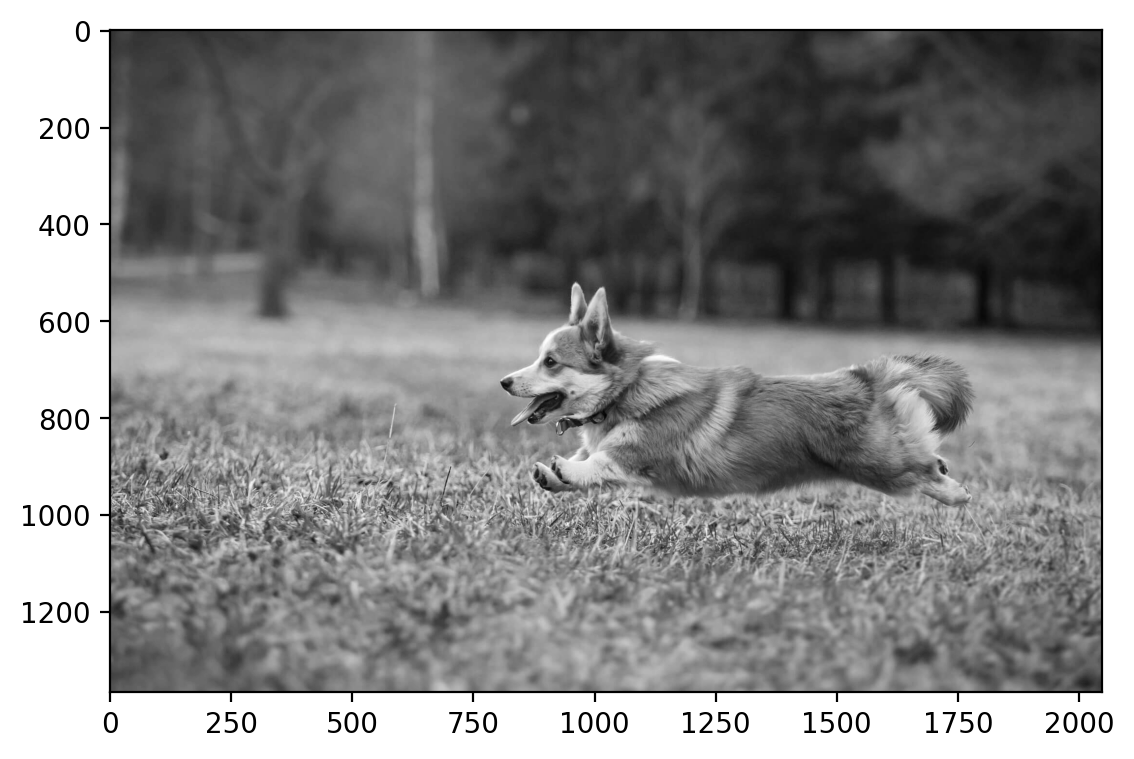

In [44]:
plt.imshow(img, cmap='gray')

In [45]:
crop = torchvision.transforms.functional.crop(img, 600, 800, 300, 300)
crop.shape

torch.Size([300, 300])

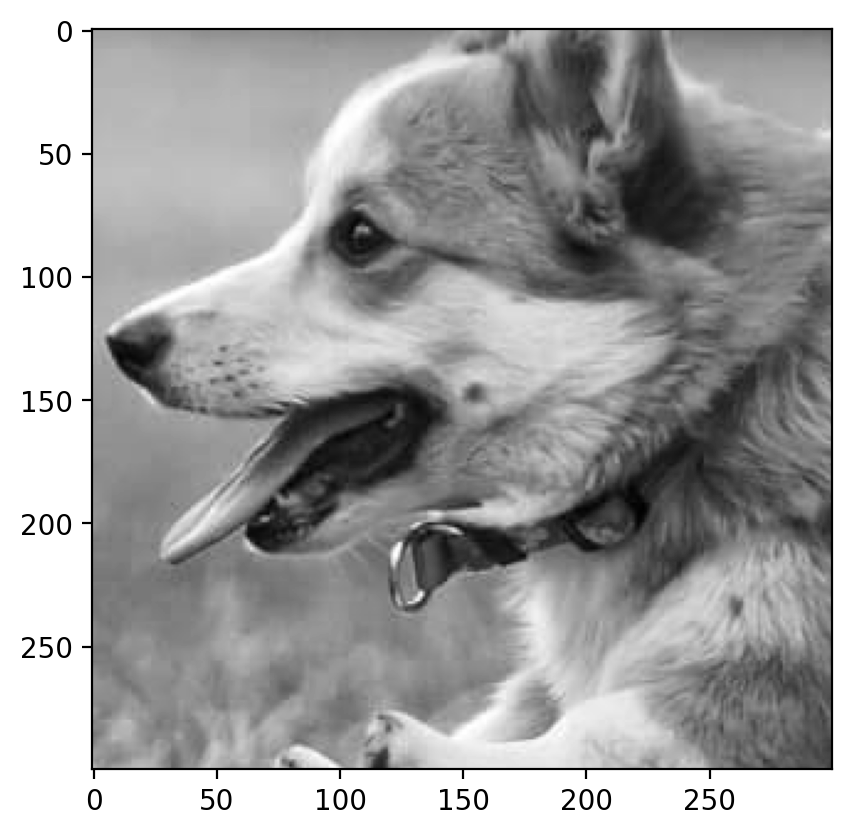

In [46]:
plt.imshow(crop, cmap='gray')

In [47]:
# Mask the image with NaN values 
def mask_image(img, prop):
    img_copy = img.clone()
    mask = torch.rand(img.shape) < prop
    img_copy[mask] = float('nan')
    return img_copy, mask

In [48]:
masked_img = mask_image(crop, 0.3)


In [49]:
masked_img[1].sum()

tensor(27141)

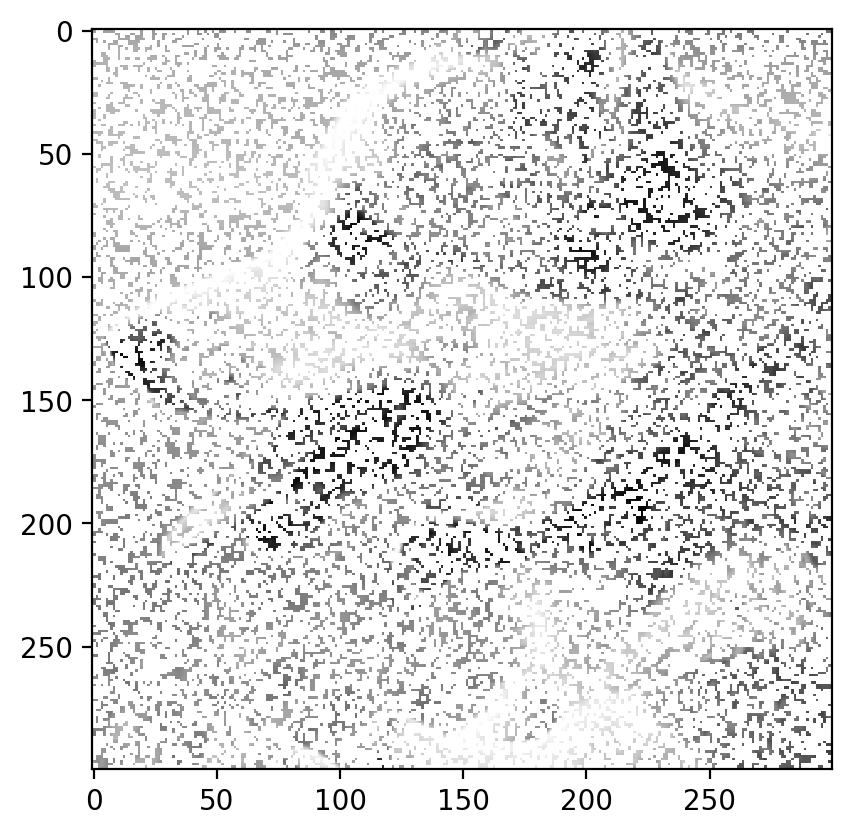

In [50]:
plt.imshow(masked_img[0], cmap='gray')

In [51]:
W, H, loss = factorize(masked_img[0], 50, device=device)

In [52]:
loss

tensor(1323.5085, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)

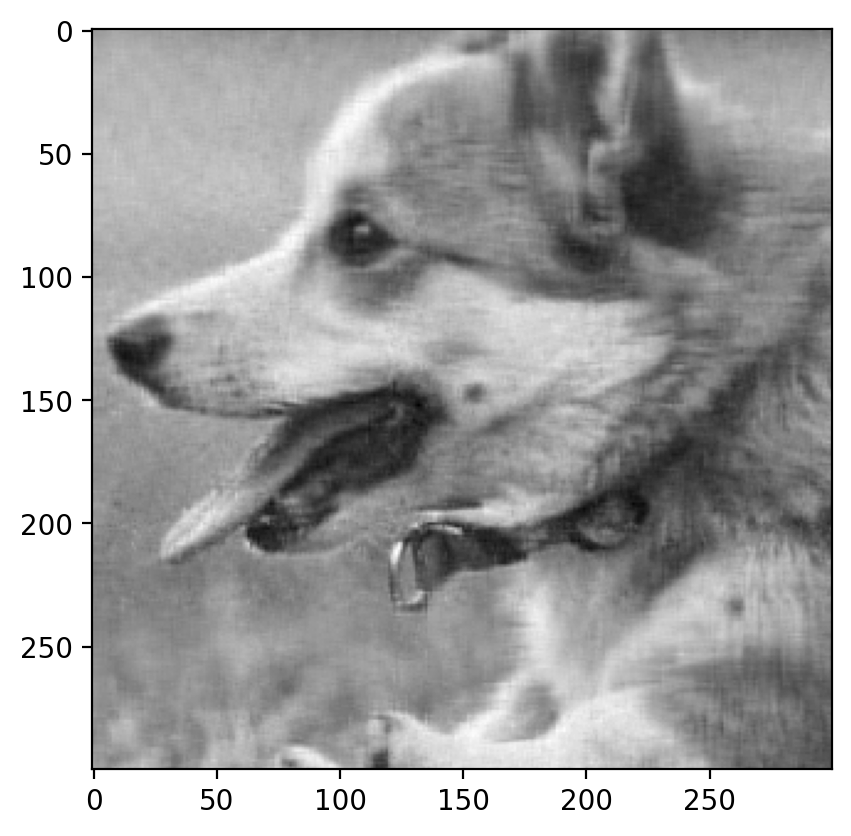

In [53]:
plt.imshow(torch.mm(W, H).cpu().detach().numpy(), cmap='gray')

In [54]:
def plot_image_completion(prop=0.1, factors=50):
    masked_img, mask = mask_image(crop, prop)
    W, H, loss = factorize(masked_img, factors, device=device)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    reconstructed_img = torch.mm(W, H).cpu().detach().numpy()
    ax[0].imshow(masked_img, cmap='gray')
    ax[0].set_title("Masked image")
    ax[1].imshow(reconstructed_img, cmap='gray')
    ax[1].set_title("Reconstructed image")

In [55]:
interact(plot_image_completion, prop=widgets.FloatSlider(min=0.01, max=0.9, step=0.01, value=0.3), factors=widgets.IntSlider(min=1, max=150, step=1, value=50))

interactive(children=(FloatSlider(value=0.3, description='prop', max=0.9, min=0.01, step=0.01), IntSlider(valu…

<function __main__.plot_image_completion(prop=0.1, factors=50)>

In [45]:
# Now use matrix faactaorization to predict the ratings

import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a class for the model

class MatrixFactorization(nn.Module):
    def __init__(self, n_users, n_movies, n_factors=20):
        super().__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.movie_factors = nn.Embedding(n_movies, n_factors)

    def forward(self, user, movie):
        return (self.user_factors(user) * self.movie_factors(movie)).sum(1)      

In [46]:
model = MatrixFactorization(n_users, n_movies, 2)
model

MatrixFactorization(
  (user_factors): Embedding(100, 2)
  (movie_factors): Embedding(10, 2)
)

In [47]:
model(torch.tensor([0]), torch.tensor([2]))

tensor([-0.0271], grad_fn=<SumBackward1>)

In [48]:
A[0, 2]

tensor(5.)

In [49]:
type(A)

torch.Tensor

In [50]:
mask = ~torch.isnan(A)

# Get the indices of the non-NaN values
i, j = torch.where(mask)

# Get the values of the non-NaN values
v = A[mask]

# Store in PyTorch tensors
users = i.to(torch.int64)
movies = j.to(torch.int64)
ratings = v.to(torch.float32)

In [51]:
pd.DataFrame({'user': users, 'movie': movies, 'rating': ratings})

,user,movie,rating
0,0,1,5.0
1,0,2,5.0
2,0,4,1.0
3,0,5,1.0
4,0,6,4.0
...,...,...,...
512,98,8,2.0
513,98,9,4.0
514,99,0,1.0
515,99,4,2.0


In [52]:
# Fit the Matrix Factorization model
model = MatrixFactorization(n_users, n_movies, 4)
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(1000):
    # Compute the loss
    pred = model(users, movies)
    loss = F.mse_loss(pred, ratings)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 100 == 0:
        print(loss.item())


14.604362487792969
4.332712650299072
1.0960761308670044
0.6966323852539062
0.5388827919960022
0.45243579149246216
0.4012693464756012
0.3728969395160675
0.35568001866340637
0.34289655089378357


In [53]:
model(users, movies)

tensor([3.5693, 4.5338, 2.6934, 1.8316, 4.8915, 2.0194, 2.7778, 1.8601, 2.1124,
        1.1378, 2.9079, 5.0470, 0.9911, 1.9791, 1.0050, 3.9618, 2.0085, 2.0034,
        4.0113, 1.9218, 2.9801, 1.0432, 3.8993, 4.1292, 1.9357, 3.8285, 3.5266,
        1.3640, 2.3989, 2.4166, 0.8559, 3.3685, 4.4493, 3.4018, 1.4722, 4.8378,
        4.6684, 4.4473, 4.3097, 2.0022, 5.0147, 5.0113, 1.9599, 2.8305, 1.4493,
        1.6750, 0.9520, 3.8460, 5.1279, 4.7453, 2.1484, 1.8009, 3.2104, 4.2068,
        4.5473, 2.9229, 1.1817, 3.1108, 3.2157, 1.2238, 3.6272, 3.9029, 3.2554,
        0.9945, 3.0062, 5.0030, 4.1144, 1.6314, 3.7945, 3.3091, 4.0727, 3.6212,
        2.4359, 3.5707, 1.2826, 0.9663, 4.9973, 3.0163, 2.9916, 1.0014, 3.1734,
        3.8712, 4.3364, 3.7119, 4.5313, 2.3875, 4.0274, 4.7121, 4.3851, 2.8072,
        3.2066, 3.9684, 0.9307, 1.4160, 2.7484, 2.8771, 1.2753, 2.5825, 4.9857,
        2.0109, 1.0080, 2.2618, 2.7936, 2.5859, 3.0972, 3.1443, 3.8655, 3.2023,
        2.0061, 1.9866, 4.0068, 2.7861, 

In [54]:
# Now, let's predict the ratings for our df dataframe

A = torch.from_numpy(df.values)
A.shape

torch.Size([45, 10])

In [55]:
mask = ~torch.isnan(A)

# Get the indices of the non-NaN values
i, j = torch.where(mask)

# Get the values of the non-NaN values
v = A[mask]

# Store in PyTorch tensors
users = i.to(torch.int64)
movies = j.to(torch.int64)
ratings = v.to(torch.float32)

In [56]:
pd.DataFrame({'user': users, 'movie': movies, 'rating': ratings})

,user,movie,rating
0,0,0,4.0
1,0,1,5.0
2,0,2,4.0
3,0,3,4.0
4,0,4,5.0
...,...,...,...
371,44,3,4.0
372,44,4,4.0
373,44,5,4.0
374,44,6,4.0


In [57]:
# Fit the Matrix Factorization model
n_users = A.shape[0]
n_movies = A.shape[1]
model = MatrixFactorization(n_users, n_movies, 4)
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(1000):
    # Compute the loss
    pred = model(users, movies)
    loss = F.mse_loss(pred, ratings)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 100 == 0:
        print(loss.item())


19.889324188232422
3.1148574352264404
0.6727441549301147
0.5543633103370667
0.5081750750541687
0.4629250764846802
0.4147825837135315
0.36878159642219543
0.32987719774246216
0.29975879192352295


In [58]:
# Now, let us predict the ratings for any user and movie from df for which we already have the ratings

username = 'Dhruv'
movie = 'The Dark Knight'

# Get the user and movie indices
user_idx = df.index.get_loc(username)
movie_idx = df.columns.get_loc(movie)

# Predict the rating
pred = model(torch.tensor([user_idx]), torch.tensor([movie_idx]))
pred.item(), df.loc[username, movie]

(5.259384632110596, 5.0)

In [59]:
df.loc[username]

Sholay                      NaN
Swades (We The People)      NaN
The Matrix (I)              5.0
Interstellar                5.0
Dangal                      3.0
Taare Zameen Par            NaN
Shawshank Redemption        5.0
The Dark Knight             5.0
Notting Hill                4.0
Uri: The Surgical Strike    5.0
Name: Dhruv, dtype: float64

In [60]:
# Now, let us predict the ratings for any user and movie from df for which we do not have the ratings

username = 'Dhruv'
movie = 'Sholay'

# Get the user and movie indices
user_idx = df.index.get_loc(username)
movie_idx = df.columns.get_loc(movie)

# Predict the rating
pred = model(torch.tensor([user_idx]), torch.tensor([movie_idx]))
pred, df.loc[username, movie]

(tensor([3.7885], grad_fn=<SumBackward1>), nan)

In [61]:
# Complete the matrix
with torch.no_grad():
    completed_matrix = pd.DataFrame(model.user_factors.weight @ model.movie_factors.weight.t(), index=df.index, columns=df.columns)
    # round to nearest integer
    completed_matrix = completed_matrix.round()

In [62]:
completed_matrix.head()

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,5.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0
Gautam Vashishtha,3.0,3.0,4.0,4.0,2.0,3.0,4.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0
Sai Krishna Avula,4.0,4.0,3.0,4.0,4.0,6.0,4.0,3.0,3.0,4.0
Ankit Yadav,3.0,2.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0


In [63]:
df.head()

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0
